Names: Nicolas Duboc, Farukh Chishtie, Mina Deshler, Caroline Webber, Alex Huang

In [1]:
# your import statements
import numpy as np

Let's go back to the long hallway with the smoker.   

Consider a long hallway (length $L = 20$m) in an office building. If we assume that any
cigarette smoke mixes across the width of the hallway and vertically
through the depth of the hallway much faster than it mixes along the
hallway, we can write the diffusion of cigarette smoke as an equation
$$\frac {\partial S} {\partial t}
= \frac {\partial \kappa \partial S}{\partial x^2} - \gamma S + \alpha(x)$$
where $S$ is the concentration of smoke, $\kappa = 0.05 $m$^2 $s$^{-1}$ is the rate of diffusion of
smoke, $\gamma = 1/(3600 {\rm s})^{-1}$ is the rate that the smoke sticks to the ceiling, $\alpha(x)$ is the sources of smoke, t is the time and x is
distance along the hallway.  No smoke leaves through either end of the hallway.  We will assume the smoker is at $x=L/3$, and puts out 0.005 su s$^{-1}$ (su = smoke units).

**Question 1**

Under what conditions can you move $\kappa$ outside the derivative?  Make that assumption here.  What is your new differential equation?

Rate of diffusion is constant, therefore $\kappa$ does not depend on x. The Diff equation becomes:

$$\frac {\partial S} {\partial t}
= \kappa \frac {\partial S}{\partial x} - \gamma S + \alpha(x)$$


**Question 2**

Using a centre-difference scheme, separating your hallway into $N=15$ divisions (so $N+1=16$ grid points) and noting that the 0th and $N=16$th grid points are boundary points we can use the following function to create a matrix that solves your equations in Question 1, assuming steady state.  That is writing your systems as:
$$ {\rm matrix} \cdot \vec S = \vec \alpha $$
where $\vec S$ is your vector of $S$ values at the grid points and $\vec \alpha$ is your vector of sources, all zero except at index 5.

In [2]:
def create_matrix_alpha(L, kappa, gamma, alpha_o):
    N = 15
    dx = L/N
    matrix = np.zeros((N+1, N+1))
    alpha = np.zeros(N+1)
    matrix[0, 0] = 1
    matrix[0, 1] = -1
    for i in range(1, N):
        matrix[i, i-1] = kappa/dx**2
        matrix[i, i] = -(2*kappa/dx**2 + gamma)
        matrix[i, i+1] = kappa/dx**2
    matrix[N, N] = 1
    matrix[N, N-1] = -1
    alpha[int(N/3)] = -alpha_o

    return matrix, alpha

In [36]:
matrix, alpha = create_matrix_alpha(L=20, kappa=0.05, gamma=1/3600, alpha_o=0.005)

Find the steady state solution.

In [37]:
S = np.linalg.solve(matrix,alpha)
S 

array([1.40427204, 1.40427204, 1.4181414 , 1.44601708, 1.48817442,
       1.54502978, 1.43936691, 1.34792002, 1.26978591, 1.2041929 ,
       1.15049315, 1.10815629, 1.07676419, 1.0560068 , 1.04567911,
       1.04567911])

**Question 3**

Now consider the case where the smoker stops.  Starting from the above steady state, we want to consider how the system changes in time. So we have:
$$ \frac {\partial \vec S}{\partial t} = matrix \cdot \vec S$$

Discretize this equation using a forward Euler method for the time stepping.  (I suggest you continue to use the vector notation but add subscripts to mark the time at which variables are evaluated, e.g. $\vec S_i$ would be the smoke at time step $i$.)

$$\frac{S_{i+1} -S_{i}}{\Delta t} = matrix \cdot \vec S_{i}$$
$$S_{i+1} = S_{i}+ \Delta t (matrix \cdot \vec S_{i})$$

**Question 4**

Solve the system and plot the solution at various times.  
Hints:
   * Enforce the boundary conditions ($S[0] = S[1]$ and $S[N] = S[N-1]$ at each time step.
   * Try a time step of 5 s and run for, say 15 time steps
   * To multiple a matrix by a vector, use np.matmul(matrix, vector)

In [38]:
def deriv_S(matrix,S):
    return np.matmul(matrix,S)

In [39]:
deltat = 5 
timeVec = np.arange(0,80,deltat)
Sn1 = []
S1 = S
for i in range(1,len(timeVec)):
    S_new = S1 + deltat*deriv_S(matrix,S1)
    S_new[0] = S_new[1]
    S_new[-1] = S_new[-2]
    Sn1.append(S_new)
    S1 = S_new
        

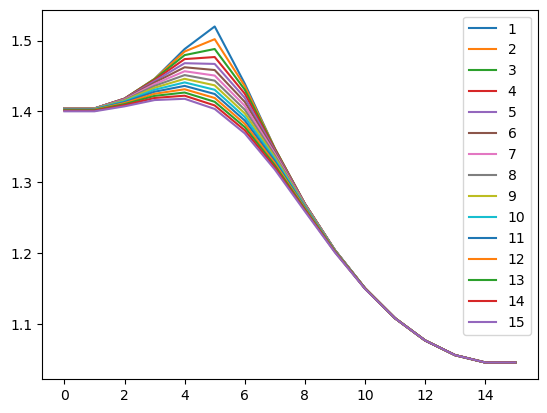

In [40]:
import matplotlib.pyplot as plt

for i in range(len(Sn1)):
    plt.plot(Sn1[i],label=i+1)
    plt.legend()

**Question 5 (optional)**

If you have time, try solving the system using the midpoint method.

In [41]:
Sm = []
Sm.append(S)
for i in range(1,len(timeVec)):
    k1 = deltat*deriv_S(matrix,Sm[i-1])
    k2 = deltat*(deriv_S(matrix,Sm[i-1]+(0.5*k1)))
    S_new2 = Sm[i-1]+k2
    S_new2[0] = S_new2[1]
    S_new2[-1] = S_new2[-2]
    Sm.append(S_new2)

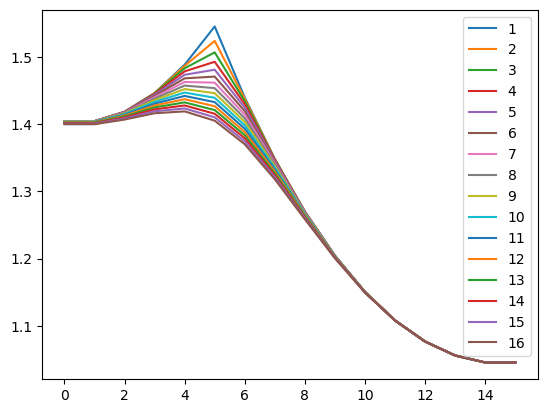

In [42]:
for i in range(len(Sm)):
    plt.plot(Sm[i],label=i+1)
    plt.legend()